In [1]:
#import The Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
!pip install xgboost


In [3]:
#loading the dataset from csv file to a pandas dataframe
big_mart_data = pd.read_csv("Train.csv")

In [4]:
#first 5 rows  of the data frame
big_mart_data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [6]:
# getting some informations about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# catagorical Features
# Item_identifier
# Item_Fat_Content
#   Item_Type
# Outlet_Identifier
#  Item_Type 
# Outlet_Location_Type  
#  Outlet_Size 
# Outlet_Type


In [8]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# handling missing values
# Mean--> average value
# mode--> Most Repeated Value


In [10]:
# Mean value of 'item_Weight' column
big_mart_data['Item_Weight'].mean()


12.857645184135976

In [11]:
# filling the missing values in 'Item_weight' column with 'Mean' value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)

In [12]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
#replacing the missing value in "Outlet_size" with Mode
mode_of_Outlet_Size  = big_mart_data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [14]:
print(mode_of_Outlet_Size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [15]:
missing_values = big_mart_data['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [16]:
# Find missing values in 'Outlet_Size'
missing_values = big_mart_data['Outlet_Size'].isnull()

# Calculate the mode of 'Outlet_Size'
mode_outlet_size = big_mart_data['Outlet_Size'].mode()[0]

# Fill missing values with the mode
big_mart_data.loc[missing_values, 'Outlet_Size'] = mode_outlet_size


In [17]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
#Data Analysis

# getting statistical summarization about the data 
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
#Numerical Feartures
sns.set()

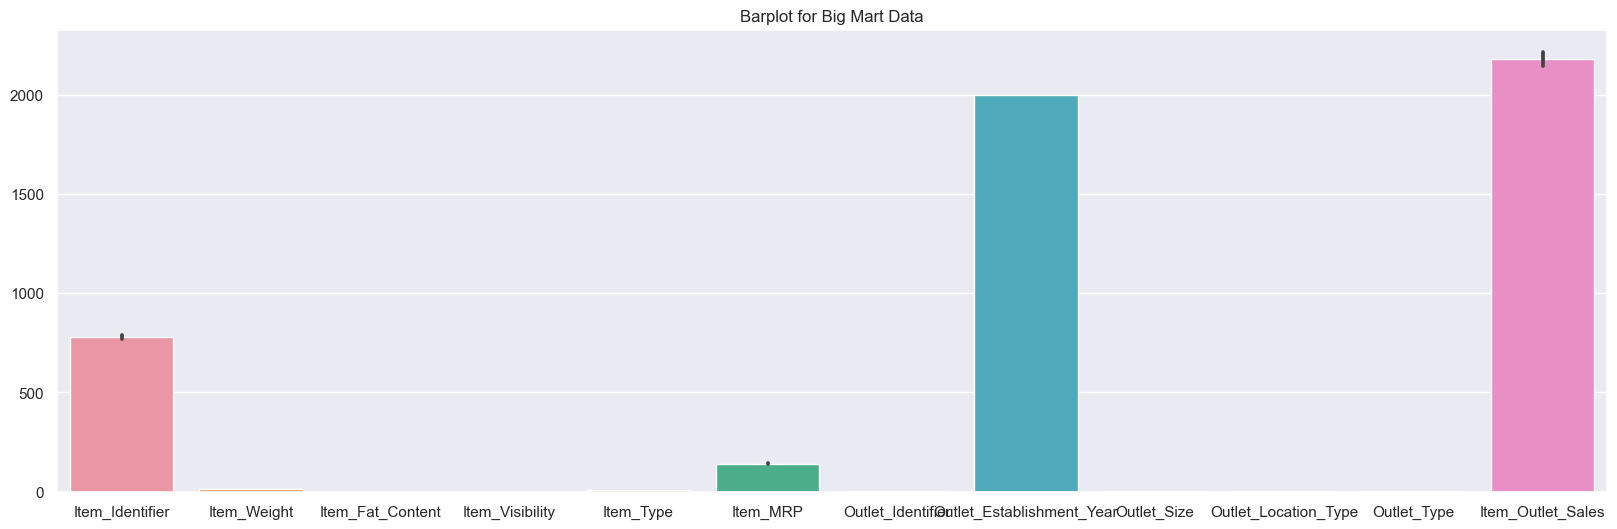

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming big_mart_data is your DataFrame
# Example: big_mart_data = pd.DataFrame({'Category': categories, 'Value': values})

# Set the size of the figure using figsize
plt.figure(figsize=(20, 6))

# Create a barplot using Seaborn
sns.barplot(data=big_mart_data)

plt.title('Barplot for Big Mart Data')

plt.show()


C:\Users\ajith\AppData\Local\Temp\ipykernel_7704\3891787066.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


<function matplotlib.pyplot.show(close=None, block=None)>

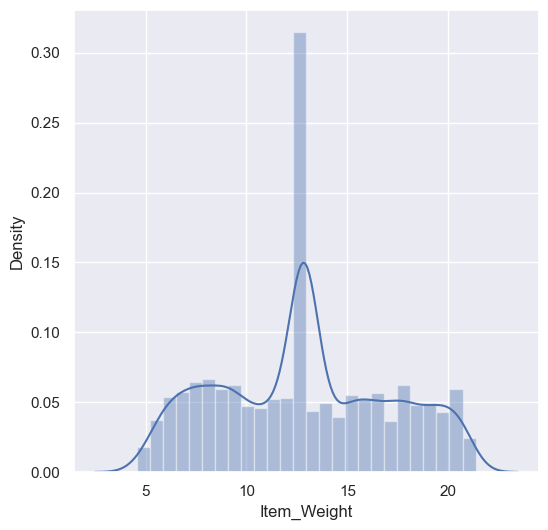

In [20]:
#Item_weight Disribution 
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show           

C:\Users\ajith\AppData\Local\Temp\ipykernel_7704\3381815189.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


<function matplotlib.pyplot.show(close=None, block=None)>

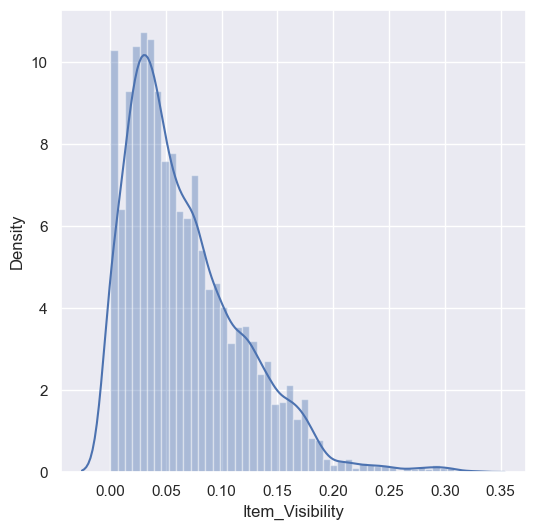

In [21]:
#Item_Visibility Disribution 
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show

C:\Users\ajith\AppData\Local\Temp\ipykernel_7704\2121362119.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


<function matplotlib.pyplot.show(close=None, block=None)>

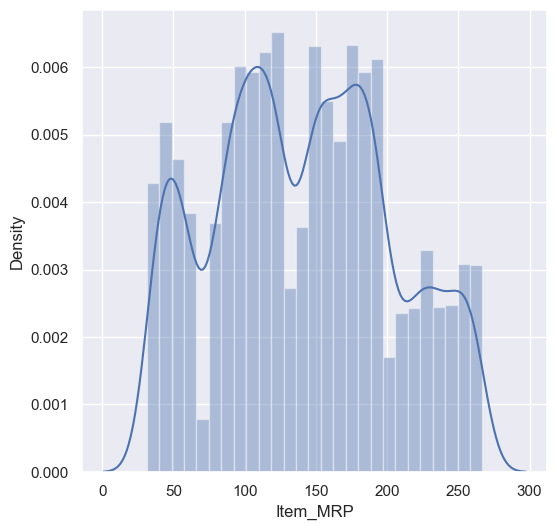

In [22]:
#Item_MRP  Disribution 
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show

C:\Users\ajith\AppData\Local\Temp\ipykernel_7704\363880201.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


<function matplotlib.pyplot.show(close=None, block=None)>

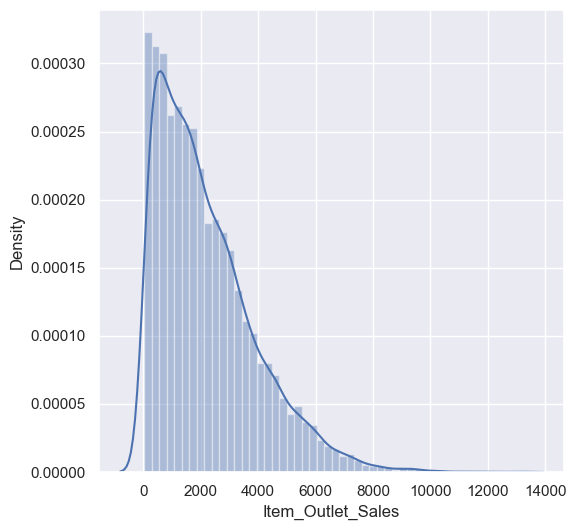

In [23]:
#Item_Outlet_Sales  Disribution 
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show

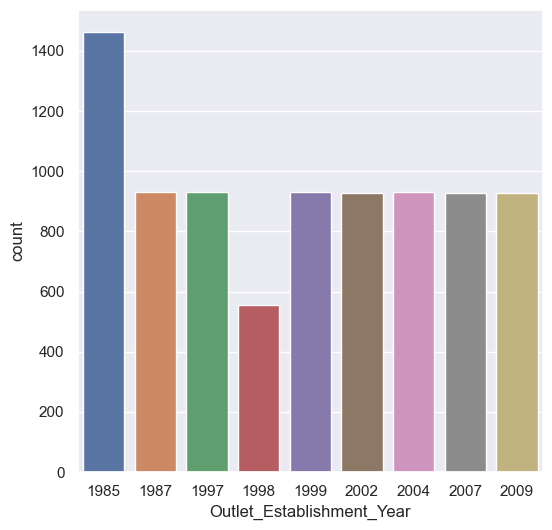

In [24]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data= big_mart_data)
plt.show()

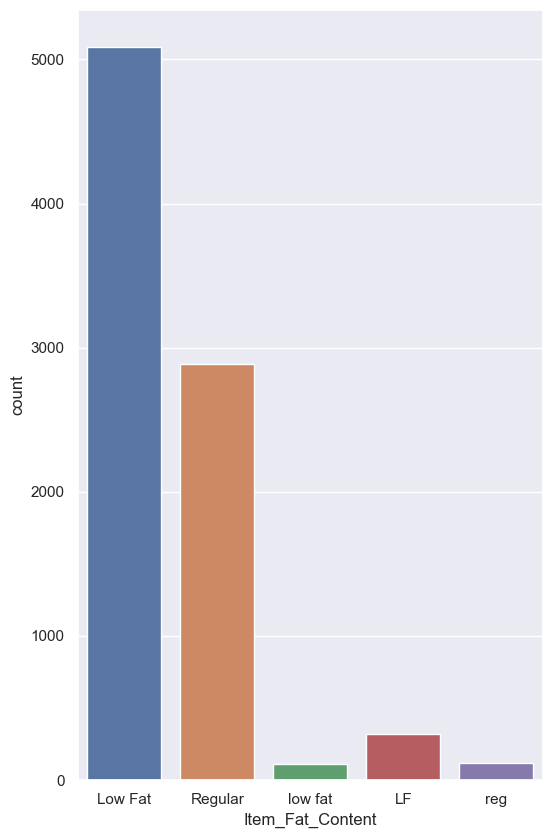

In [25]:
# catagorical Features

#Item_Fat_Content column
plt.figure(figsize=(6,10))
sns.countplot(x='Item_Fat_Content', data= big_mart_data)
plt.show()

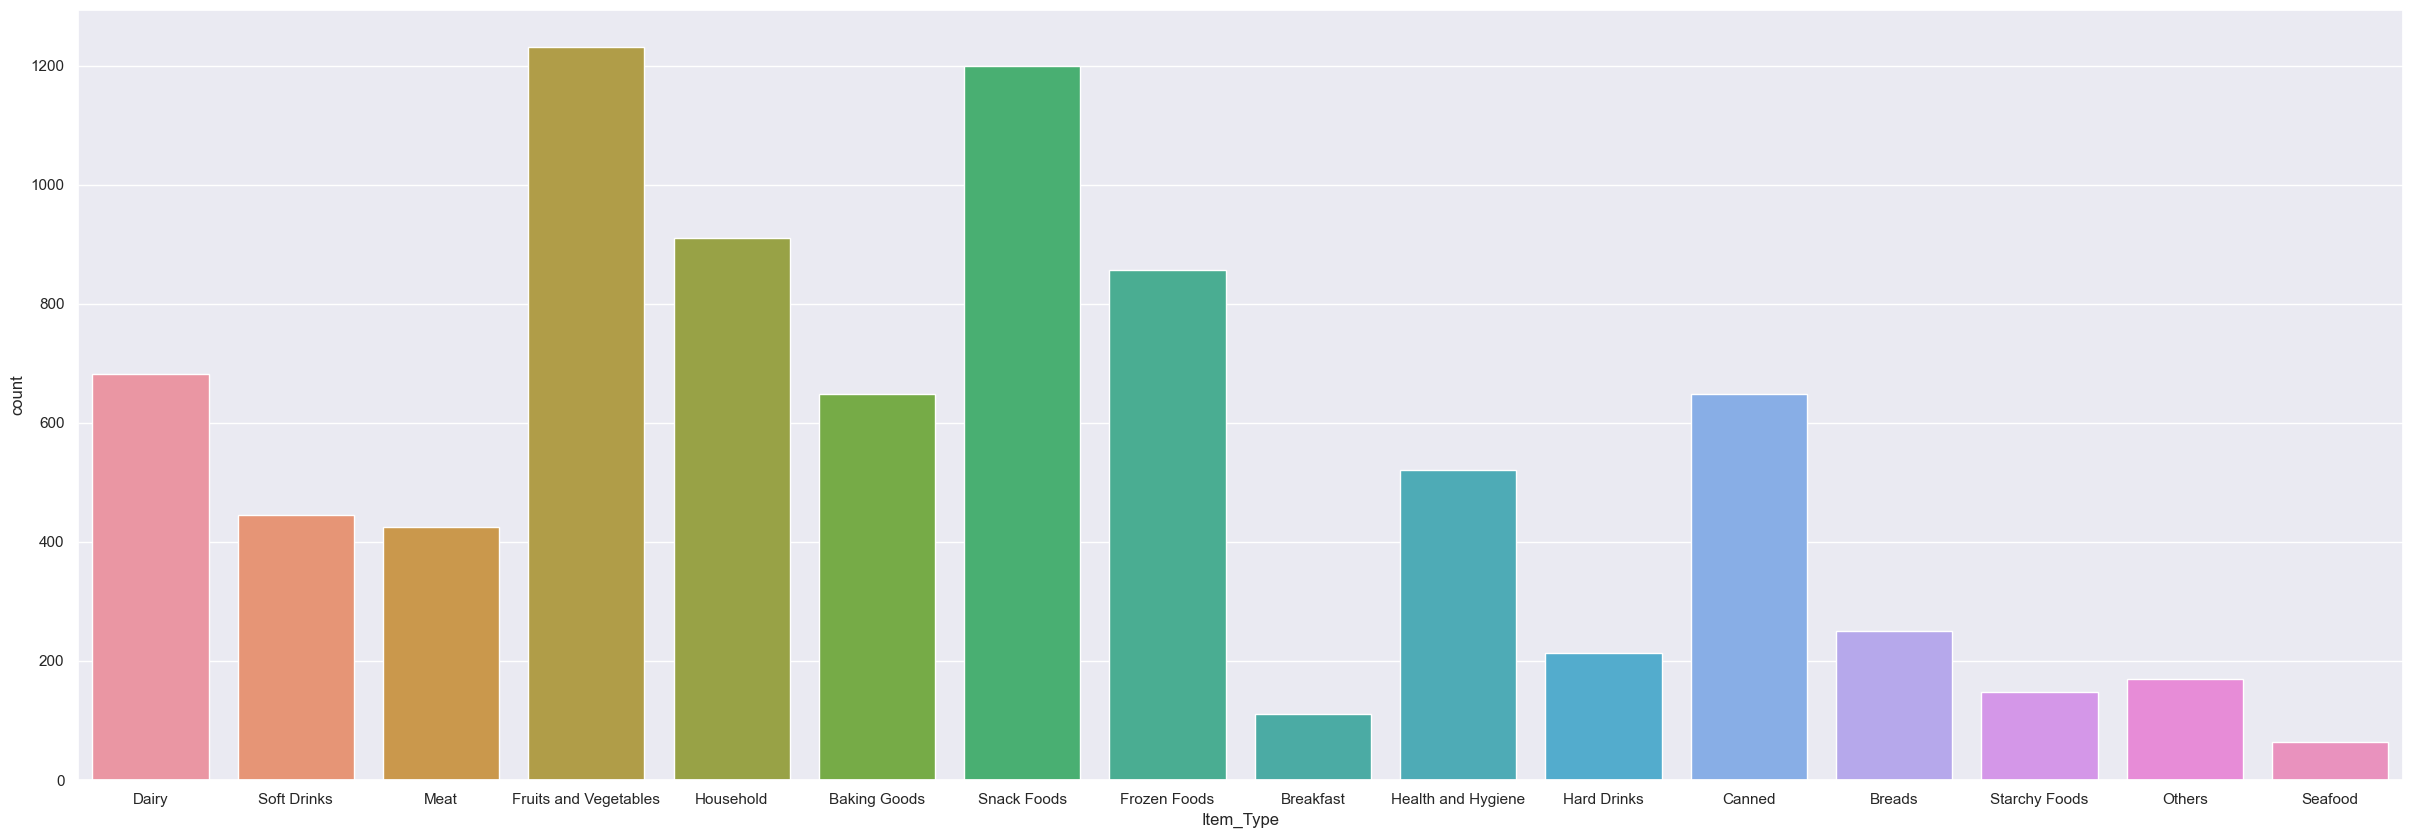

In [26]:
#Item_Type column
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type', data= big_mart_data)
plt.show()

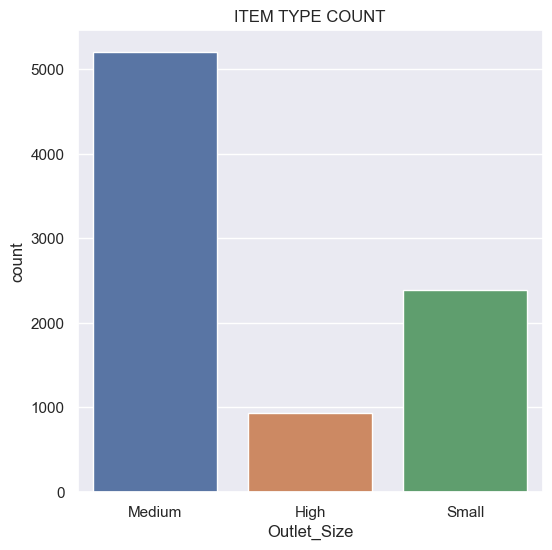

In [27]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data= big_mart_data)
plt.title('ITEM TYPE COUNT')
plt.show()

In [28]:
big_mart_data.corr

<bound method DataFrame.corr of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

C:\Users\ajith\AppData\Local\Temp\ipykernel_7704\1454154826.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(big_mart_data['Item_Outlet_Sales'], shade=True,)
C:\Users\ajith\AppData\Local\Temp\ipykernel_7704\1454154826.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(big_mart_data['Item_Outlet_Sales'], shade=True,)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


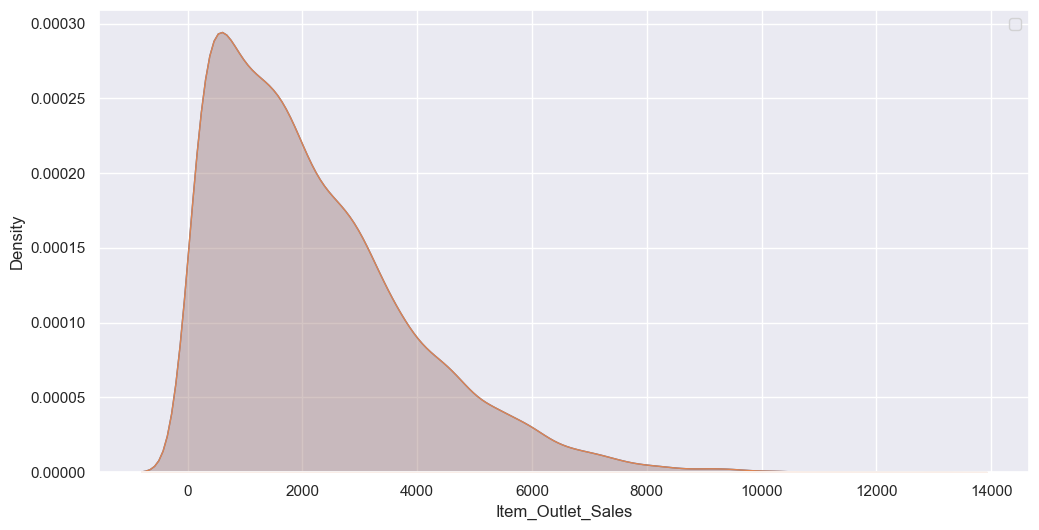

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming big_mart_data is your DataFrame
columns_to_plot = ['Item_Outlet_Sales', 'Item_Type',]

plt.figure(figsize=(12, 6))

for column in columns_to_plot:
    sns.kdeplot(big_mart_data['Item_Outlet_Sales'], shade=True,)

plt.legend()
plt.show()


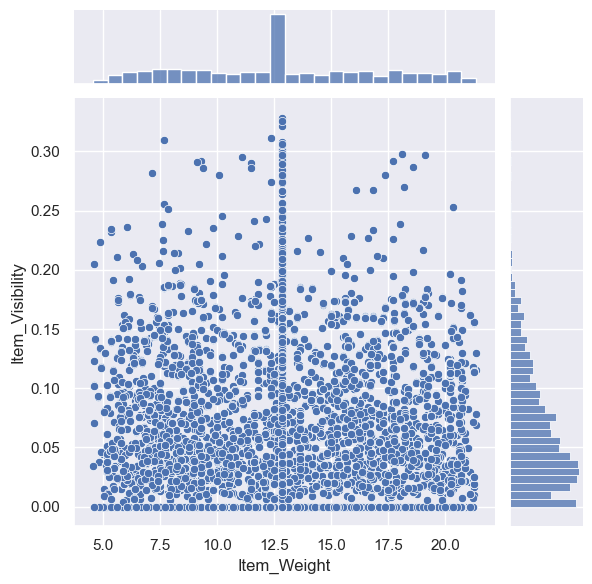

In [105]:
sns.jointplot(x='Item_Weight',y='Item_Visibility',data=big_mart_data)

<Axes: xlabel='Outlet_Type', ylabel='Item_MRP'>

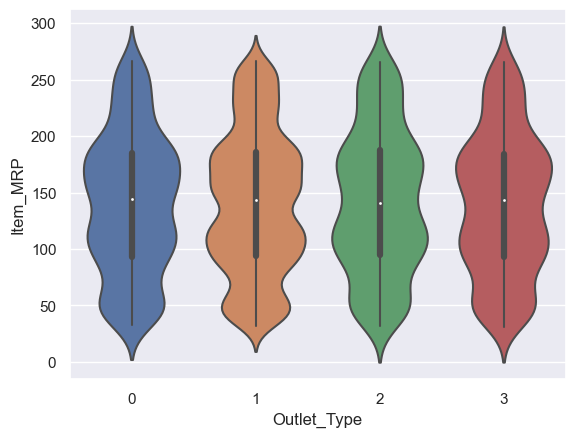

In [111]:
sns.violinplot(x='Outlet_Type',y='Item_MRP',data=big_mart_data)

C:\Users\ajith\AppData\Local\Temp\ipykernel_7704\77228985.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'],color='green')


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

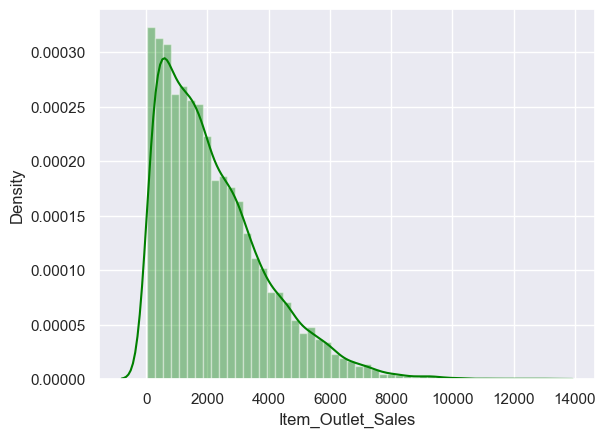

In [112]:
sns.distplot(big_mart_data['Item_Outlet_Sales'],color='green')

<Axes: xlabel='Outlet_Type', ylabel='Count'>

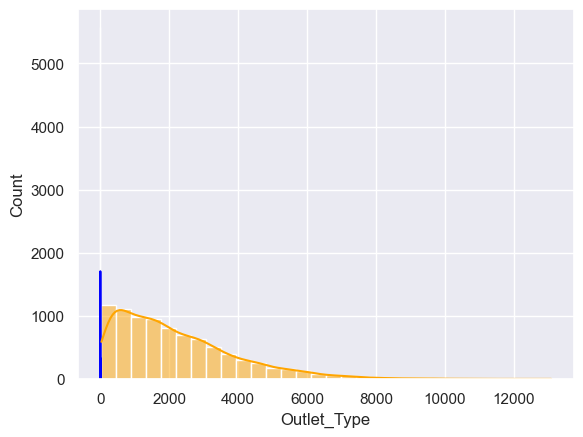

In [119]:
sns.histplot(big_mart_data['Outlet_Type'], color='blue', bins=30, kde=True, label='Distribution')
sns.histplot(data=big_mart_data, x='Item_Outlet_Sales', color='orange', bins=30, kde=True, label='Item_Outlet_Sales')



In [29]:
big_mart_data.corr

<bound method DataFrame.corr of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [65]:
# Sample data for illustration purposes
features = [[1, 2], [3, 4], [5, 6]]
target = [10, 20, 30]

# Assuming you have your features and target variable
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Rest of the code...

# The error might occur here if your train_test_split doesn't return the expected 4 values
# Make sure that your train_test_split call is returning two sets of features and two sets of target variables


In [66]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have your features and target variable
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.2, random_state=42)

# Create XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)

# Fit the model
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 100.01815878326306


In [67]:
# DATA PREPROCESSING
big_mart_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [68]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [69]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace= True)

In [70]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [71]:
# LABEL ENCODING
encoder = LabelEncoder()

In [72]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [73]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [74]:
# SPLITTING FEATURE AND TARGET(FEATURE ENGINEERING)

y = big_mart_data['Item_Outlet_Sales']


In [75]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [76]:
x = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)

In [77]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [124]:
# splitting the data into training data and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [79]:
print(x.shape, x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [80]:
#MACHINE LEARNING MODEL TRAINING(xgboost)
model = XGBRegressor()



In [81]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [82]:
# EVALUATION
# PREDICTION ON TRAINING DATA
training_data_prediction = model.predict(x_train)

In [83]:
# R SQUARED VALUE
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [84]:
print('R sqaure value = ',r2_train)

R sqaure value =  0.8757573565795517


In [85]:
# PREDICTION ON TEST DATA
test_data_prediction = model.predict(x_test)


In [86]:
r2_test = metrics.r2_score(y_test, test_data_prediction)

In [87]:
print('R sqaure value = ',r2_test)

R sqaure value =  0.5322944924053683


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming x_train and y_train are your training data
# Assuming x_test and y_test are your testing data

# Create and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Make predictions on the testing data
y_predict = linear_model.predict(x_test)

# Evaluate the performance of the model (for regression problems)
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)


Mean Squared Error: 1291997.4524092982


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming X_train and y_train are your training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred = model.predict(_train)

# Calculate R-squared score
r2 = r2_score(y_train, y_pred)

print(f'R-squared score: {r2}')


R-squared score: 1.0


In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming x_train and y_train are your training data
# Assuming x_test and y_test are your testing data

# Create and train a decision tree regressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(x_test)

# Evaluate the performance of the model (for regression problems)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2227599.5122857536


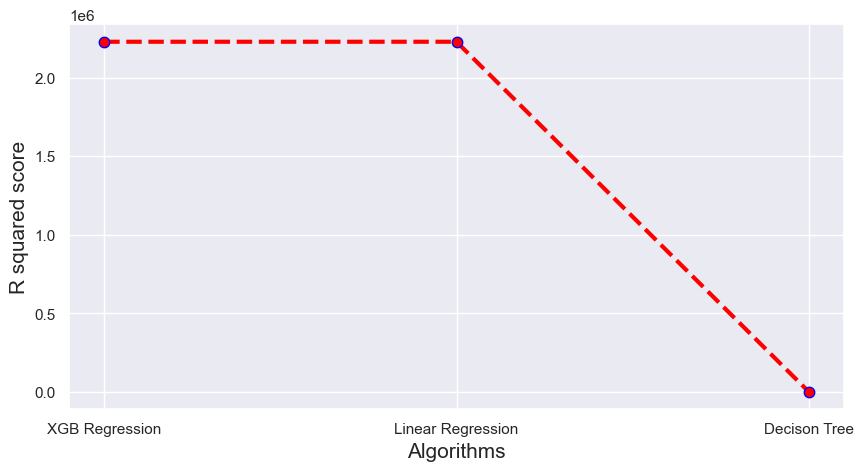

In [161]:
x=['XGB Regression','Linear Regression','Decison Tree']
y=[mse,mse,r2_test]
plt.figure(1,figsize=(10,5))
plt.plot(x,y,label='line width is 5x',linewidth=3,linestyle="--",color="red",marker='.',markersize=15,markeredgecolor="blue")
plt.xlabel("Algorithms",fontsize=15)
plt.ylabel("R squared score",fontsize=15)
plt.show()

In [91]:
new_data=(156,9.3,0,0.016047301,4,249.8092,9,1999,1,0,1)
new_data_np=np.asarray(new_data)
new_data_reshaped=new_data_np.reshape(1,-1)

prediction=model.predict(new_data_reshaped)
prediction


array([3874.4736], dtype=float32)

In [92]:
if prediction[0]==0:
    print("High sale")
elif prediction[0]==1:
    print("Low sale")
else:
    print("Average sale")

Average sale


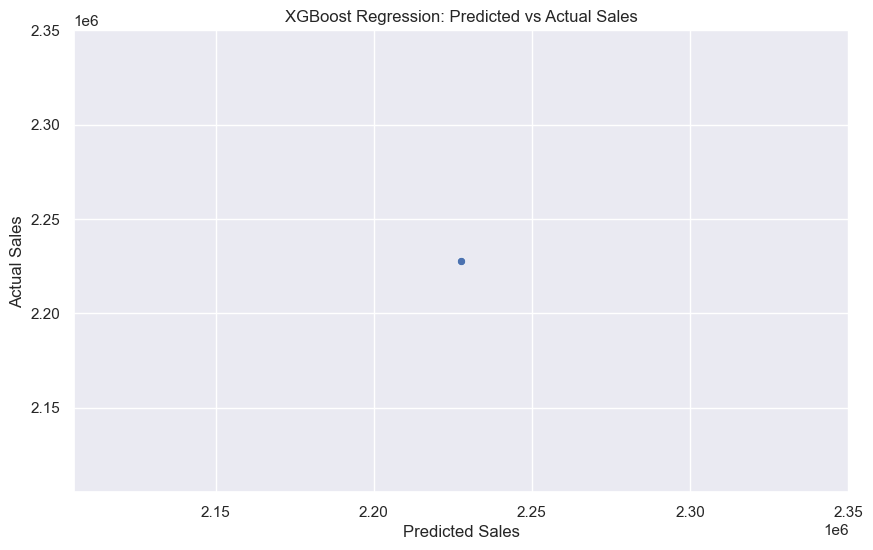

In [173]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=y_test)
plt.title('XGBoost Regression: Predicted vs Actual Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales')
plt.show()